## Flights and Pollution Regression Analysis

In [49]:
# Most useful guides (scipy box-cox?)
# https://towardsdatascience.com/is-normal-distribution-necessary-in-regression-how-to-track-and-fix-it-494105bc50dd
# https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/
# https://aegis4048.github.io/transforming-non-normal-distribution-to-normal-distribution


# linear regression assumptions
# https://www.statisticssolutions.com/assumptions-of-linear-regression/

# normality assumptions
# https://data.library.virginia.edu/normality-assumption/

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [117]:
# load in the required datasets
flights = pd.read_csv('../cleaned_flight_data.csv', encoding='utf-8')
pollution = pd.read_csv('data_treatment_model_ready/pollution_ccg_model_wide.csv', encoding='utf-8')

In [118]:
# fix the datasets
flights.rename(columns={'Unnamed: 0': 'Year', 'number of flights': 'number of flights (thousand)'}, inplace=True)
pollution.drop(columns=['Unnamed: 0'], inplace=True)

In [119]:
# make flights and pollution years consistent (so we can map them for model analysis)
flights = flights[flights['Year'] >= 2004]
print(flights.Year.unique())

pollution = pollution[pollution['Year'] < 2020]
print(pollution.Year.unique())

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]
[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]


In [120]:
flights['number of flights (thousand)'] = flights['number of flights (thousand)'] / 1000
flights.sort_values(by='number of flights (thousand)', ascending=False)

,Year,number of flights (thousand)
29,2018,480.339
30,2019,479.811
22,2011,476.295
28,2017,476.186
18,2007,475.789
19,2008,473.207
27,2016,473.199
26,2015,472.058
16,2005,472.041
23,2012,471.382


In [121]:
# is the data normally distributed? 
pollution.head()

,CCG_Poll_Map,Year,Nitrogen dioxide,PM10
0,Ealing,2004,57.882938,23.333576
1,Ealing,2005,52.862974,25.916647
2,Ealing,2006,55.035635,25.443425
3,Ealing,2007,54.247691,24.401769
4,Ealing,2008,58.848371,22.141475


## Check Model Data Distribution: Is the data normally distributed?

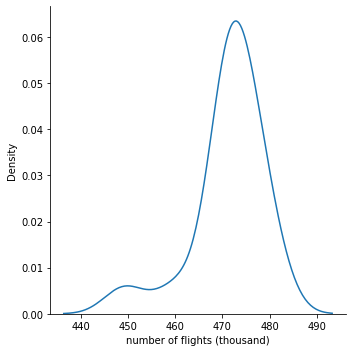

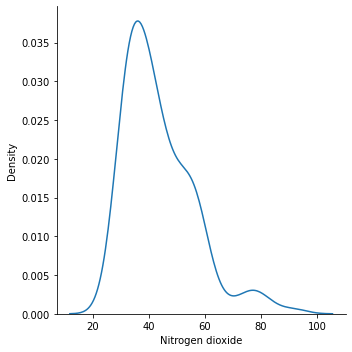

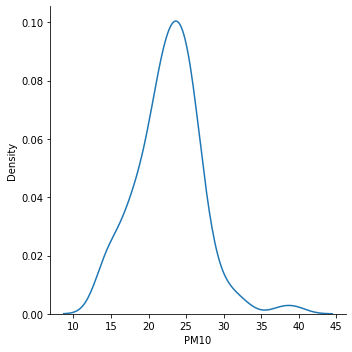

The data is not normally distributed for pollutants (PM10, N20) or Flights, further steps required.


In [122]:
# https://towardsdatascience.com/is-normal-distribution-necessary-in-regression-how-to-track-and-fix-it-494105bc50dd
sns.displot(flights['number of flights (thousand)'], kind='kde')
plt.show()
sns.displot(pollution['Nitrogen dioxide'], kind='kde')
plt.show()
sns.displot(pollution[pollution['CCG_Poll_Map'] != 'Hounslow']['PM10'], kind='kde')
plt.show()
print('The data is not normally distributed for pollutants (PM10, N20) or Flights, further steps required.')

In [123]:
# test whether data is nornally distributed using the built in Shapiro-Wilk test
# Default : reject H0 at 5% significance (if P is > 0.05 then reject H0, and dist is classified as normal)

print('test for number of flights is :', stats.shapiro(flights['number of flights (thousand)']))
print('test for number of PM10 is :', stats.shapiro(pollution[pollution['CCG_Poll_Map'] != 'Hounslow']['PM10']))
print('test for number of N20 is :', stats.shapiro(pollution['Nitrogen dioxide']))

print('it appears flights, PM10 and N2O are non-normal (with 5% significanve, P<0.05 so accept H0)')

test for number of flights is : ShapiroResult(statistic=0.8102771043777466, pvalue=0.00374137656763196)
test for number of PM10 is : ShapiroResult(statistic=0.9650267362594604, pvalue=0.0009810469346120954)
test for number of N20 is : ShapiroResult(statistic=0.8975527882575989, pvalue=4.124542041239465e-09)
it appears flights, PM10 and N2O are non-normal (with 5% significanve, P<0.05 so accept H0)


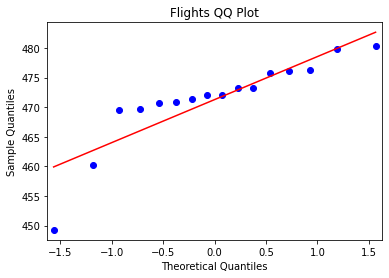

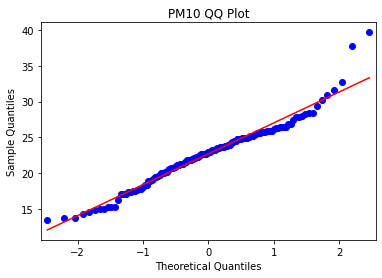

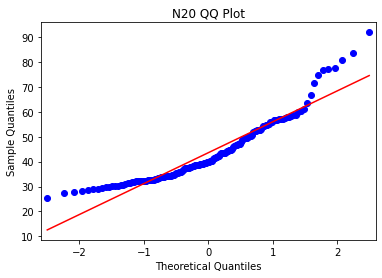

In [192]:
# finally, visualise using QQ plots 
fig = sm.qqplot(flights['number of flights (thousand)'],line='s')
plt.title('Flights QQ Plot')
plt.show()

fig = sm.qqplot(pollution[pollution['CCG_Poll_Map'] != 'Hounslow']['PM10'] ,line='s')
plt.title('PM10 QQ Plot')
plt.show()

fig = sm.qqplot(pollution['Nitrogen dioxide'] ,line='s')
plt.title('N20 QQ Plot')

plt.show()

The QQ plots above show that the variables are too non-normal (and that removing outliers will not help to normalise the distribution). Instead, the team should check how to apply a transformation the samples.

The team will first try with a box-cox transformation.

/Users/gaylej/.virtualenvs/aa_at_py3/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


lambda of best fit for flights is  34.95723628247484


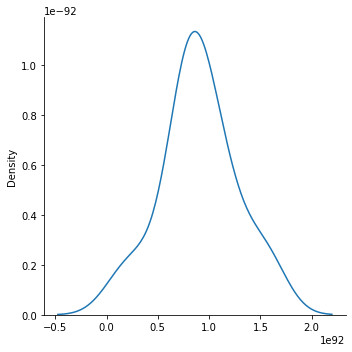

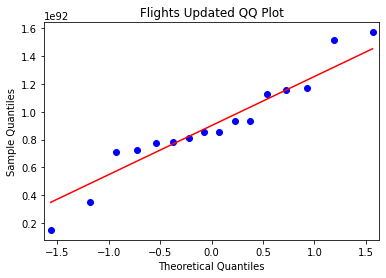

lambda of best fit for PM10 is  0.5325973436566406


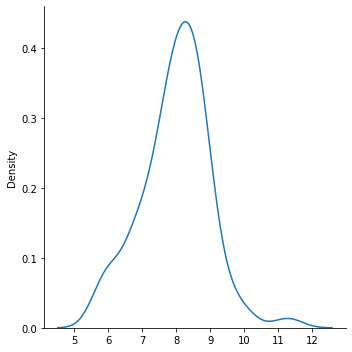

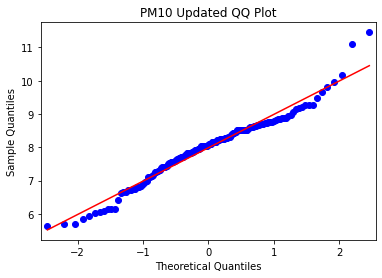

lambda of best fit for N20  -0.9911421037759461


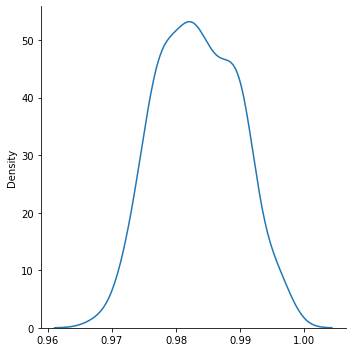

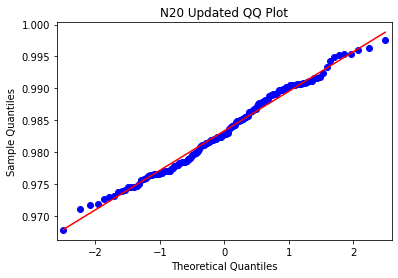

In [193]:
#transform the data using box-cox, not specifyimg a lambda will allow scipy find the best fit (betweem -5 and 5)
sample_transformed_fl, lmbda = stats.boxcox(flights['number of flights (thousand)'])
print('lambda of best fit for flights is ', lmbda)

#plot the distribution curve and QQ-plot for transformed data
sns.displot(sample_transformed_fl, kind='kde')
plt.show()
fig = sm.qqplot(sample_transformed_fl, line='s')
# finally, visualise using QQ plots 
plt.title('Flights Updated QQ Plot')
plt.show()

#transform the data using box-cox, not specifyimg a lambda will allow scipy find the best fit (betweem -5 and 5)
sample_transformed_pm, lmbda = stats.boxcox(pollution[pollution['CCG_Poll_Map'] != 'Hounslow']['PM10'])
print('lambda of best fit for PM10 is ', lmbda)

#plot the distribution curve and QQ-plot for transformed data
sns.displot(sample_transformed_pm, kind='kde')
plt.show()
fig = sm.qqplot(sample_transformed_pm, line='s')
plt.title('PM10 Updated QQ Plot')
plt.show()

#transform the data using box-cox, not specifyimg a lambda will allow scipy find the best fit (betweem -5 and 5)
sample_transformed_n2, lmbda = stats.boxcox(pollution['Nitrogen dioxide'])
print('lambda of best fit for N20 ', lmbda)

#plot the distribution curve and QQ-plot for transformed data
sns.displot(sample_transformed_n2, kind='kde')
plt.show()
fig = sm.qqplot(sample_transformed_n2, line='s')
plt.title('N20 Updated QQ Plot')
plt.show()

### Regression Model  (first do on the non-normal data, after, check whether we can do on the normalised values)
Inspired by: https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0


also look at: https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8

#### Regression Analysis - Flights and PM10

In [129]:
# we need to join the pollution x flights datasets, so we have the same number of points

pollution.head()
pollution_flights = pd.merge(pollution, flights, how='left', on='Year')

In [143]:
pollution_flights.rename(columns={'Nitrogen dioxide': 'N20', 'number of flights (thousand)': 'nr_flights_thou'}, inplace=True)

In [160]:
inner = ['Ealing','Hillingdon', 'Hounslow', 'South West London', 'Hammersmith and Fulham', 'Surrey Heartlands',]
outer = ['Oxford', 'Watford', 'Reading', 'East Berkshire',]

In [140]:
pollution_flights.head()


,CCG_Poll_Map,Year,N20,PM10,number of flights (thousand)
0,Ealing,2004,57.882938,23.333576,469.786
1,Ealing,2005,52.862974,25.916647,472.041
2,Ealing,2006,55.035635,25.443425,470.891
3,Ealing,2007,54.247691,24.401769,475.789
4,Ealing,2008,58.848371,22.141475,473.207


Intercept          135.019296
nr_flights_thou     -0.194016
dtype: float64


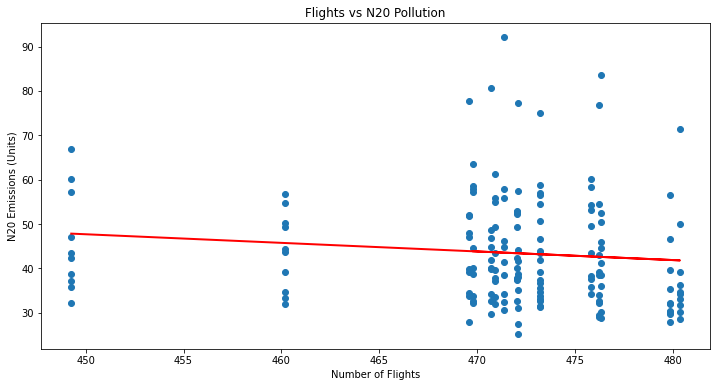

Intercept          101.76014
nr_flights_thou     -0.11960
dtype: float64


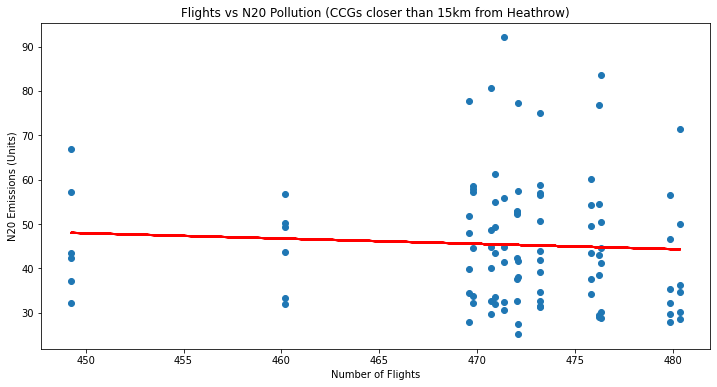

Intercept          184.908030
nr_flights_thou     -0.305641
dtype: float64


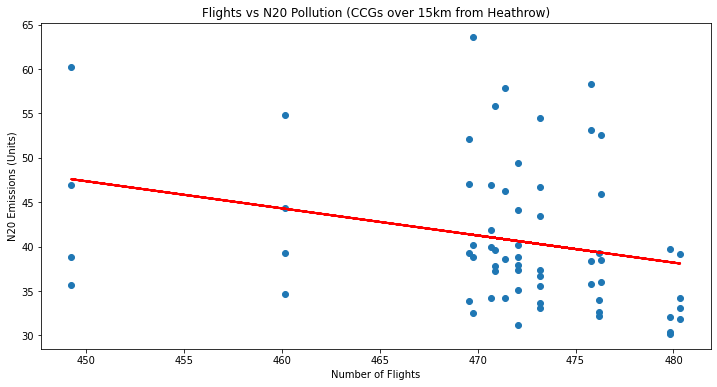

In [165]:
#1. look at linear regression between nitrogen dioxide and flights
model = smf.ols('N20 ~ nr_flights_thou', data=pollution_flights)
model = model.fit()
print(model.params)


# Predict values
n20_pred = model.predict()    # n2o is the y value, what we are predicting (y=mx + c)
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(pollution_flights['nr_flights_thou'], pollution_flights['N20'], 'o')           # scatter plot showing actual data
plt.plot(pollution_flights['nr_flights_thou'], n20_pred, 'r', linewidth=2)   # regression line,      n20 is the y value (what we are predicting)
plt.xlabel('Number of Flights')
plt.ylabel('N20 Emissions (Units)')
plt.title('Flights vs N20 Pollution')
plt.show()



#2. look at linear regression between nitrogen dioxide and flights for CCGs under 15km from heathrow
poll_inn = pollution_flights[pollution_flights['CCG_Poll_Map'].isin(inner)]
model = smf.ols('N20 ~ nr_flights_thou', data=poll_inn)
model = model.fit()
print(model.params)

# Predict values
n20_pred = model.predict()    # n2o is the y value, what we are predicting (y=mx + c)

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(poll_inn['nr_flights_thou'], poll_inn['N20'], 'o')           # scatter plot showing actual data
plt.plot(poll_inn['nr_flights_thou'], n20_pred, 'r', linewidth=2)   # regression line,      n20 is the y value (what we are predicting)
plt.xlabel('Number of Flights')
plt.ylabel('N20 Emissions (Units)')
plt.title('Flights vs N20 Pollution (CCGs closer than 15km from Heathrow)')
plt.show()


#3. look at linear regression between nitrogen dioxide and flights for CCGs over 15km from heathrow
poll_out = pollution_flights[pollution_flights['CCG_Poll_Map'].isin(outer)]
model = smf.ols('N20 ~ nr_flights_thou', data=poll_out)
model = model.fit()
print(model.params)

# Predict values
n20_pred = model.predict()    # n2o is the y value, what we are predicting (y=mx + c)

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(poll_out['nr_flights_thou'], poll_out['N20'], 'o')           # scatter plot showing actual data
plt.plot(poll_out['nr_flights_thou'], n20_pred, 'r', linewidth=2)   # regression line,      n20 is the y value (what we are predicting)
plt.xlabel('Number of Flights')
plt.ylabel('N20 Emissions (Units)')
plt.title('Flights vs N20 Pollution (CCGs over 15km from Heathrow)')

plt.show()


The Regression line of best fits indicate that there is weak negative correlation between flights and N20 Pollutant emmissions. The same observationa were noted after calculating regression for CCGs closer than 15km and further away than 15km from Heathrow Airport.

Run same regression for flights vs N20 (for log values calculated previously)

Intercept        9.114898e-185
nr_flight_log     9.464914e-93
dtype: float64


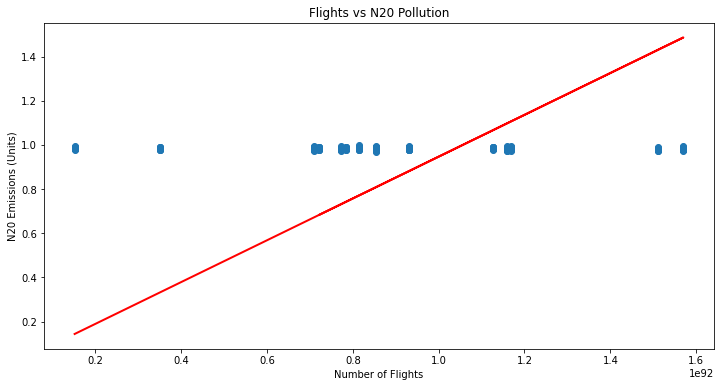

In [189]:
# also check for the standardised values we calculated previosuly
pollution_log = pollution.copy()
flights_log = flights.copy()

pollution_log['n20_log'] = sample_transformed_n2
flights_log['nr_flight_log'] = sample_transformed_fl

flights_pollution_log= pd.merge(pollution_log, flights_log, how='left', on='Year')
flights_pollution_log.rename(columns={'Nitrogen dioxide': 'N20', 'number of flights (thousand)': 'nr_flights_thou'}, inplace=True)


#1. look at linear regression between nitrogen dioxide and flights
model = smf.ols('n20_log ~ nr_flight_log', data=flights_pollution_log)
model = model.fit()
print(model.params)


# Predict values
n20_log_pred = model.predict()    # n2o is the y value, what we are predicting (y=mx + c)
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(flights_pollution_log['nr_flight_log'], flights_pollution_log['n20_log'], 'o')           # scatter plot showing actual data
plt.plot(flights_pollution_log['nr_flight_log'], n20_log_pred, 'r', linewidth=2)   # regression line,      n20 is the y value (what we are predicting)
plt.xlabel('Number of Flights')
plt.ylabel('N20 Emissions (Units)')
plt.title('Flights vs N20 Pollution')
plt.show()


#### Regression Analysis - Flights and PM10

In [167]:
print(pollution_flights.isna().sum())
pollution_flights_pm10 = pollution_flights.copy().dropna()
# drop the missing pm10 rows for hounslow (with drop na or ccg poll_map !- hounslow)
print(pollution_flights_pm10.isna().sum())


CCG_Poll_Map        0
Year                0
N20                 0
PM10               16
nr_flights_thou     0
dtype: int64
CCG_Poll_Map       0
Year               0
N20                0
PM10               0
nr_flights_thou    0
dtype: int64


Intercept          56.134335
nr_flights_thou    -0.070926
dtype: float64


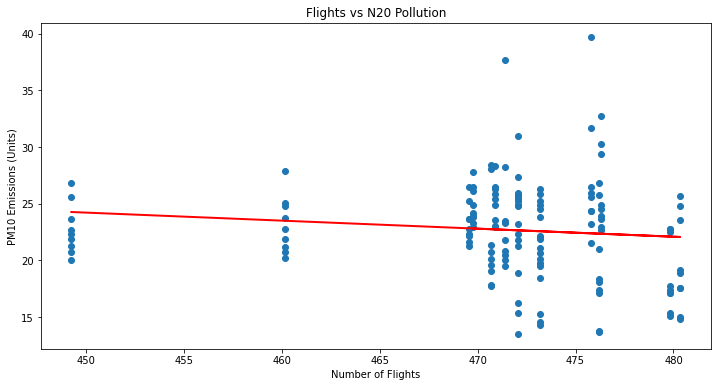

Intercept          39.018658
nr_flights_thou    -0.034927
dtype: float64


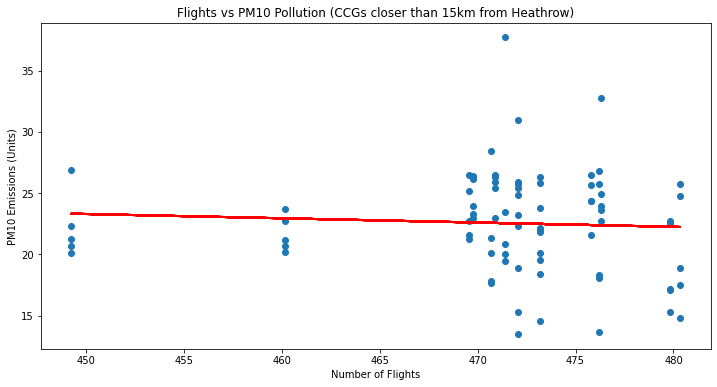

Intercept          77.528930
nr_flights_thou    -0.115924
dtype: float64


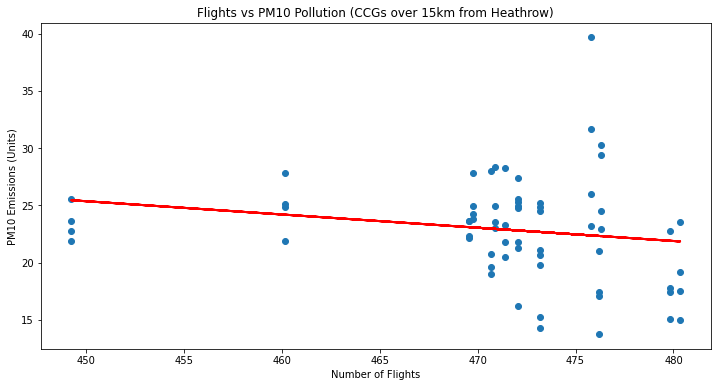

In [190]:
#1. look at linear regression between nitrogen dioxide and flights
model = smf.ols('PM10 ~ nr_flights_thou', data=pollution_flights_pm10)
model = model.fit()
print(model.params)


# Predict values
n20_pred = model.predict()    # n2o is the y value, what we are predicting (y=mx + c)
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(pollution_flights_pm10['nr_flights_thou'], pollution_flights_pm10['PM10'], 'o')           # scatter plot showing actual data
plt.plot(pollution_flights_pm10['nr_flights_thou'], n20_pred, 'r', linewidth=2)   # regression line,      n20 is the y value (what we are predicting)
plt.xlabel('Number of Flights')
plt.ylabel('PM10 Emissions (Units)')
plt.title('Flights vs PM10 Pollution')
plt.show()


#2. look at linear regression between nitrogen dioxide and flights for CCGs under 15km from heathrow
poll_inn = pollution_flights_pm10[pollution_flights_pm10['CCG_Poll_Map'].isin(inner)]
model = smf.ols('PM10 ~ nr_flights_thou', data=poll_inn)
model = model.fit()
print(model.params)

# Predict values
pm10_pred = model.predict()    # n2o is the y value, what we are predicting (y=mx + c)

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(poll_inn['nr_flights_thou'], poll_inn['PM10'], 'o')           # scatter plot showing actual data
plt.plot(poll_inn['nr_flights_thou'], pm10_pred, 'r', linewidth=2)   # regression line,      n20 is the y value (what we are predicting)
plt.xlabel('Number of Flights')
plt.ylabel('PM10 Emissions (Units)')
plt.title('Flights vs PM10 Pollution (CCGs closer than 15km from Heathrow)')
plt.show()



#2. look at linear regression between nitrogen dioxide and flights for CCGs over 15km from heathrow
poll_out = pollution_flights_pm10[pollution_flights_pm10['CCG_Poll_Map'].isin(outer)]
model = smf.ols('PM10 ~ nr_flights_thou', data=poll_out)
model = model.fit()
print(model.params)

# Predict values
pm10_pred = model.predict()    # n2o is the y value, what we are predicting (y=mx + c)

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(poll_out['nr_flights_thou'], poll_out['PM10'], 'o')           # scatter plot showing actual data
plt.plot(poll_out['nr_flights_thou'], pm10_pred, 'r', linewidth=2)   # regression line,      n20 is the y value (what we are predicting)
plt.xlabel('Number of Flights')
plt.ylabel('PM10 Emissions (Units)')
plt.title('Flights vs PM10 Pollution (CCGs over 15km from Heathrow)')
plt.show()



Initial analysis shows no relationship between Flights and Pm10 across all CCGS. Dividing the analysis into CCGs closer than 15km to heathrow and further away than 15km from Heathrow yields similar results 

## Lineaer Regression Models: Test Significance
Inspired by: https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8


In [196]:
pollution_flights.head()

,CCG_Poll_Map,Year,Nitrogen dioxide,PM10,n20_log,number of flights (thousand),nr_flight_log
0,Ealing,2004,57.882938,23.333576,0.990868,469.786,7.222790e+91
1,Ealing,2005,52.862974,25.916647,0.989168,472.041,8.538938e+91
2,Ealing,2006,55.035635,25.443425,0.989942,470.891,7.841020e+91
3,Ealing,2007,54.247691,24.401769,0.989669,475.789,1.125824e+92
4,Ealing,2008,58.848371,22.141475,0.991162,473.207,9.308043e+91


In [197]:
# first test N2O and flights model... 

# test significance for 5%; if P is less than 0.05 then we can assume there is a correlation between the two variables
alpha = 0.05


X = pollution_flights['Nitrogen dioxide']

y = pollution_flights['number of flights (thousand)']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                                 OLS Regression Results                                 
Dep. Variable:     number of flights (thousand)   R-squared:                       0.013
Model:                                      OLS   Adj. R-squared:                  0.007
Method:                           Least Squares   F-statistic:                     2.068
Date:                          Fri, 29 Jan 2021   Prob (F-statistic):              0.152
Time:                                  20:54:33   Log-Likelihood:                -543.45
No. Observations:                           160   AIC:                             1091.
Df Residuals:                               158   BIC:                             1097.
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

As P is greater than 0.05 we can conclude that there is no correlation between Nitrogen Dioxide and Flights
We can see that R-squared is 0.013, which supports that N20 and Flights are not correlated 